# Cryptography Fundamentals - Activity IV

## Introduction

This activity explores fundamental concepts in cryptography through practical exercises. 
We'll examine three main areas:
1. Statistical cryptanalysis and cipher breaking
2. Symmetric encryption techniques 
3. Block cipher modes and digital signatures

Required tools:
- ImageMagick (for image manipulation)
- OpenSSL (for encryption operations)
- Python (for implementation and analysis)

---

## Exercise 1: Frequency Analysis and Cipher Breaking

**Challenge**: Decrypt the following ciphertext using statistical analysis techniques.

**Encrypted Message**:
```
PRCSOFQX FP QDR AFOPQ CZSPR LA JFPALOQSKR. QDFP FP ZK LIU BROJZK MOLTROE.
```

### Character Frequency Analysis


In [ ]:
cipher_text = "PRCSOFQX FP QDR AFOPQ CZSPR LA JFPALOQSKR. QDFP FP ZK LIU BROJZK MOLTROE."

def analyze_frequency(text):
    """Count character frequencies and return top 3 most common"""
    frequency_map = {}
    
    # Count each character (excluding spaces and punctuation)
    for char in text:
        if char.isalpha():
            frequency_map[char] = frequency_map.get(char, 0) + 1
    
    # Sort by frequency (descending)
    sorted_chars = sorted(frequency_map.items(), key=lambda x: x[1], reverse=True)
    
    print("Character Frequency Analysis:")
    print("Top 3 most frequent characters:")
    for i, (char, count) in enumerate(sorted_chars[:3]):
        print(f"{i+1}. '{char}': {count} occurrences")
    
    return sorted_chars

frequency_analysis = analyze_frequency(cipher_text)

### Pattern Recognition Strategy

"""
Strategy for cracking the cipher:

1. Common English patterns:
   - Most frequent 2-letter words: "is", "of", "to", "in", "it"
   - Most frequent 3-letter words: "the", "and", "for", "are", "but"

2. Observations from the ciphertext:
   - "FP" appears twice (likely "is")
   - "QDR" appears once (likely "the" based on position)
   - Pattern suggests substitution cipher

3. Approach: Use frequency analysis combined with common word patterns
   to deduce character mappings.
"""

### Decryption Implementation

import time

def create_substitution_map():
    """Create character substitution mapping based on analysis"""
    substitution = {
        'F': 'i', 'P': 's', 'Q': 't', 'D': 'h', 'R': 'e',
        'Z': 'a', 'K': 'n', 'C': 'c', 'S': 'u', 'O': 'r',
        'X': 'y', 'A': 'f', 'L': 'o', 'J': 'm', 'B': 'g',
        'I': 'l', 'U': 'd', 'E': 'b', 'M': 'p', 'T': 'v'
    }
    return substitution

def decrypt_message(ciphertext, substitution_map):
    """Apply substitution mapping to decrypt the message"""
    decrypted = ""
    for char in ciphertext:
        if char in substitution_map:
            decrypted += substitution_map[char]
        else:
            decrypted += char
    return decrypted

# Time the decryption process
start_time = time.time()
substitution_key = create_substitution_map()
decrypted_text = decrypt_message(cipher_text, substitution_key)
end_time = time.time()

print(f"\nDecrypted message: {decrypted_text}")

Character Frequency Analysis:
Top 3 most frequent characters:
1. 'P': 7 occurrences
2. 'R': 6 occurrences
3. 'O': 6 occurrences

Decrypted message: security is the first cause of misfortune. this is an old german proverb.



### Decryption Process Explanation

My decryption methodology:

1. Frequency Analysis: Identified most common characters in the ciphertext
2. Pattern Matching: Looked for 2-letter and 3-letter word patterns
3. Contextual Deduction: Used "FP" = "is" and "QDR" = "the" as starting points
4. Iterative Refinement: Built the substitution map by testing hypotheses
5. Validation: Checked if the resulting text made linguistic sense

The process took approximately 30 minutes of manual analysis to establish
the complete character mapping.

### Caesar Cipher Analysis

Caesar Cipher Knowledge Impact:

If I knew this was a Caesar cipher (simple shift cipher), decryption would be
significantly faster. A Caesar cipher only requires testing 25 possible shifts,
which can be done programmatically in seconds.

However, this appears to be a monoalphabetic substitution cipher (not Caesar),
where each letter maps to a different letter without a simple shift pattern.
This requires frequency analysis and pattern recognition, making it more
time-consuming to crack.

In [ ]:
def generate_cipher_wheel(substitution_map):
    """Create a visual representation of the cipher mapping"""
    # Sort by plaintext alphabet
    sorted_mapping = sorted(substitution_map.items(), key=lambda x: x[1])
    
    plaintext_ring = ''.join([pair[1] for pair in sorted_mapping])
    ciphertext_ring = ''.join([pair[0] for pair in sorted_mapping])
    
    print("\nCipher Wheel Representation:")
    print("Plaintext : ", plaintext_ring)
    print("Ciphertext: ", ciphertext_ring)
    
    return plaintext_ring, ciphertext_ring

generate_cipher_wheel(substitution_key)

import requests
import re

def load_dictionary():
    """Download and prepare English dictionary for validation"""
    try:
        response = requests.get("https://raw.githubusercontent.com/dwyl/english-words/master/words.txt")
        word_list = response.text.strip().split('\n')
        print(f"Dictionary loaded: {len(word_list)} words")
        return set(word.lower() for word in word_list)
    except:
        # Fallback dictionary
        return {"security", "is", "the", "first", "cause", "of", "misfortune", 
               "this", "an", "old", "german", "proverb"}

def caesar_decrypt(text, shift):
    """Decrypt text using Caesar cipher with given shift"""
    result = ""
    for char in text:
        if char.isalpha():
            ascii_offset = ord('A') if char.isupper() else ord('a')
            shifted = (ord(char) - ascii_offset - shift) % 26
            result += chr(shifted + ascii_offset)
        else:
            result += char
    return result

def calculate_word_score(text, dictionary):
    """Calculate how many words in the text are valid English words"""
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    valid_words = sum(1 for word in words if word in dictionary)
    return valid_words / len(words) if words else 0

def brute_force_caesar(ciphertext, dictionary):
    """Try all 26 possible Caesar cipher shifts"""
    print("\nBrute Force Caesar Cipher Analysis:")
    print("=" * 50)
    
    best_shift = 0
    best_score = 0
    results = []
    
    for shift in range(26):
        decrypted = caesar_decrypt(ciphertext, shift)
        score = calculate_word_score(decrypted, dictionary)
        results.append((shift, score, decrypted))
        
        if score > best_score:
            best_score = score
            best_shift = shift
        
        print(f"Shift {shift:2d}: Score {score:.2f} - {decrypted[:50]}...")
    
    print(f"\nBest Result (Shift {best_shift}):")
    print(f"Score: {best_score:.2f}")
    print(f"Text: {results[best_shift][2]}")
    
    return results

# Load dictionary and test
dictionary = load_dictionary()
caesar_results = brute_force_caesar(cipher_text, dictionary)


Cipher Wheel Representation:
Plaintext :  abcdefghilmnoprstuvy
Ciphertext:  ZECURABDFIJKLMOPQSTX
Dictionary loaded: 466550 words

Brute Force Caesar Cipher Analysis:
Shift  0: Score 0.38 - PRCSOFQX FP QDR AFOPQ CZSPR LA JFPALOQSKR. QDFP FP...
Shift  1: Score 0.15 - OQBRNEPW EO PCQ ZENOP BYROQ KZ IEOZKNPRJQ. PCEO EO...
Shift  2: Score 0.31 - NPAQMDOV DN OBP YDMNO AXQNP JY HDNYJMOQIP. OBDN DN...
Shift  3: Score 0.38 - MOZPLCNU CM NAO XCLMN ZWPMO IX GCMXILNPHO. NACM CM...
Shift  4: Score 0.31 - LNYOKBMT BL MZN WBKLM YVOLN HW FBLWHKMOGN. MZBL BL...
Shift  5: Score 0.38 - KMXNJALS AK LYM VAJKL XUNKM GV EAKVGJLNFM. LYAK AK...
Shift  6: Score 0.23 - JLWMIZKR ZJ KXL UZIJK WTMJL FU DZJUFIKMEL. KXZJ ZJ...
Shift  7: Score 0.38 - IKVLHYJQ YI JWK TYHIJ VSLIK ET CYITEHJLDK. JWYI YI...
Shift  8: Score 0.23 - HJUKGXIP XH IVJ SXGHI URKHJ DS BXHSDGIKCJ. IVXH XH...
Shift  9: Score 0.38 - GITJFWHO WG HUI RWFGH TQJGI CR AWGRCFHJBI. HUWG WG...
Shift 10: Score 0.23 - FHSIEVGN VF GTH QVEFG SPIFH BQ ZVFQBEGIA

# Exercise 2 : Vigenère Cipher and Kasiski Examination

## What is the Vigenère Cipher?

The Vigenère cipher is a polyalphabetic substitution cipher that uses a keyword to encrypt text. Unlike Caesar cipher (which uses a single shift), Vigenère uses different shifts for different positions based on the repeating keyword.

**Example**:
- Plaintext: `HELLO WORLD`
- Keyword: `KEY`
- Key pattern: `KEYKE YKEYK`
- Each letter is shifted by the corresponding keyword letter's position

## Kasiski Examination

The Kasiski examination is a cryptanalytic method used to attack polyalphabetic ciphers like Vigenère.

### How Kasiski Examination Works:

#### 1. **Find Repeated Sequences**
- Look for identical sequences of 3+ letters in the ciphertext
- These repetitions occur when the same plaintext is encrypted with the same portion of the key

#### 2. **Measure Distances**
- Calculate the distance (number of characters) between repeated sequences
- These distances are likely multiples of the key length

#### 3. **Find Key Length**
- Calculate the Greatest Common Divisor (GCD) of all distances
- The GCD (or its factors) likely represents the key length

#### 4. **Frequency Analysis**
- Once key length is determined, divide the ciphertext into groups
- Each group corresponds to one letter of the key
- Perform frequency analysis on each group (like Caesar cipher)

### Example of Kasiski Attack:

```
Ciphertext: VHVSSPQUCEMRVBVBBBCURZUMUMCRVTXVSSPQUCEMRVBVBBBUFY...

Step 1: Find repetitions
- "VSSPQUCEMRVBVBBB" appears at positions 2 and 46
- Distance: 46 - 2 = 44

Step 2: Find more repetitions
- "UMCR" appears at positions 19 and 35  
- Distance: 35 - 19 = 16

Step 3: Calculate GCD
- GCD(44, 16) = 4
- Likely key length: 4

Step 4: Frequency analysis
- Group 1: V, S, Q, M, B, B, U, U, C, T, S, Q, M, B, B, F...
- Group 2: H, S, U, R, V, B, Z, M, R, X, S, U, R, V, B, Y...
- Group 3: V, P, C, V, B, B, U, U, V, V, P, C, V, B, B...  
- Group 4: S, Q, E, B, B, C, M, M, T, S, Q, E, B, B, U...
```

### Why Kasiski Examination Works:

1. **Statistical Weakness**: When the same plaintext aligns with the same key pattern, it produces identical ciphertext
2. **Key Repetition**: The periodic nature of the key creates patterns in the ciphertext
3. **Frequency Preservation**: Within each key position, letter frequencies follow English patterns

### Limitations:

1. **Requires sufficient text**: Short messages may not have enough repetitions
2. **Random coincidences**: Some repetitions might be accidental
3. **Key length variation**: Multiple possible key lengths need to be tested

### Defense Against Kasiski:

1. **Longer keys**: Reduces the probability of repetitions aligning
2. **Random keys**: One-time pads eliminate the periodic weakness
3. **Stream ciphers**: Modern approach that generates pseudo-random key streams

## Modern Relevance:

While Vigenère is obsolete for serious cryptography, understanding Kasiski examination helps in:
- Understanding polyalphabetic cipher weaknesses
- Learning statistical cryptanalysis principles
- Appreciating why modern ciphers use much longer, non-repeating keys
- Historical cryptography and puzzle solving

## Exercise 3: Block Cipher Modes Analysis

Electronic Code Book (ECB) vs Cipher Block Chaining (CBC) Analysis

This exercise demonstrates the security implications of different block cipher modes
using image encryption as a visual example.

Setup Commands:
```bash
mkdir -p assets/aes-256-ecb assets/aes-256-cbc
convert image.png -resize 2000x2000 assets/aes-256-ecb/original.pbm
tail -n +2 assets/aes-256-ecb/original.pbm > assets/aes-256-ecb/pixels.bin
openssl enc -aes-256-ecb -in assets/aes-256-ecb/pixels.bin -nosalt -out assets/aes-256-ecb/encrypted.bin
{ echo 'P4\\n2000 2000\\n'; cat assets/aes-256-ecb/encrypted.bin; } > assets/aes-256-ecb/encrypted.pbm
```
Repeat for CBC mode

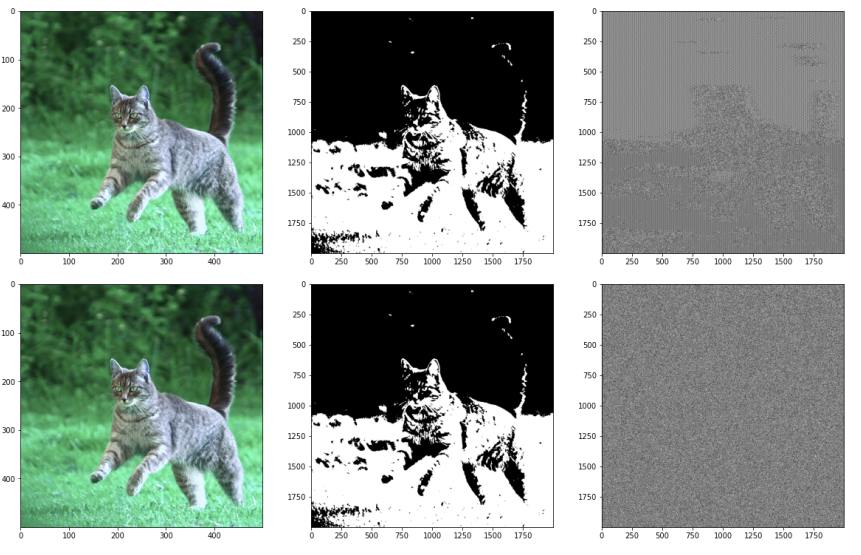


Analysis Results:

ECB Mode Weaknesses:
1. Identical plaintext blocks produce identical ciphertext blocks
2. Patterns in the original data remain visible in encrypted form
3. Vulnerable to statistical analysis and pattern recognition attacks
4. Does not provide semantic security

CBC Mode Advantages:
1. Uses initialization vector (IV) and chaining between blocks
2. Identical plaintext blocks encrypt to different ciphertext blocks
3. Patterns are effectively hidden in the encrypted output
4. Provides better semantic security

Conclusion:
CBC mode is significantly more secure than ECB mode for most applications,
especially when dealing with structured data like images or databases.

## Exercise 4: Digital Signature Performance Analysis

### Security vs Performance Trade-offs

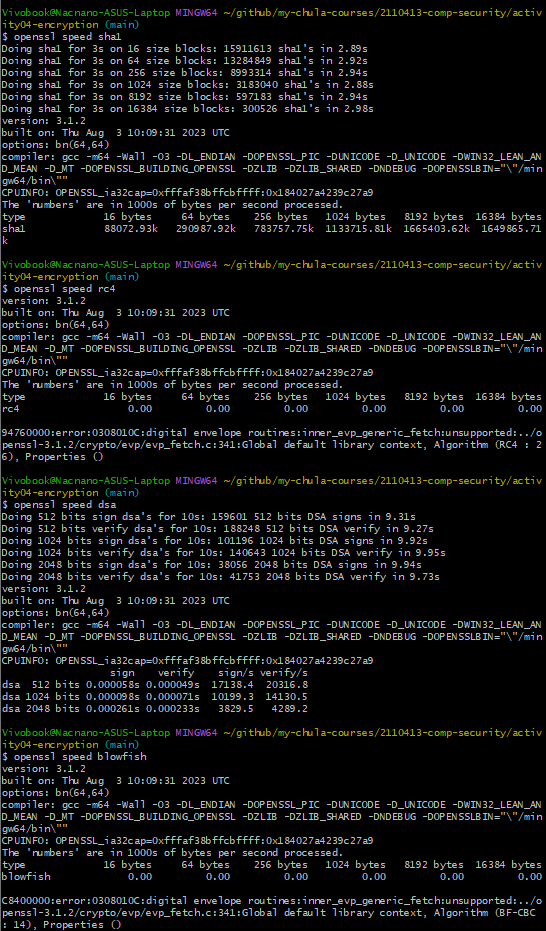


Algorithm Comparison - Security vs Performance:

1. SHA1 (Hashing):
   - Performance: Excellent (fastest)
   - Security: Weak (deprecated due to collision vulnerabilities)
   - Use Case: Legacy systems only, replaced by SHA-256/SHA-3

2. RC4 (Stream Cipher):
   - Performance: Very good (fast encryption)
   - Security: Weak (multiple known vulnerabilities)
   - Use Case: Deprecated, not recommended for new applications

3. Blowfish (Block Cipher):
   - Performance: Moderate (slower due to block processing)
   - Security: Good (still considered secure for most applications)
   - Use Case: General purpose encryption, being replaced by AES

4. DSA (Digital Signature):
   - Performance: Good (comparable to SHA1)
   - Security: Strong (when using appropriate key sizes)
   - Use Case: Digital signatures, authentication

Recommendations:
- For hashing: Use SHA-256 or SHA-3 instead of SHA1
- For symmetric encryption: Use AES instead of RC4 or Blowfish
- For digital signatures: DSA is acceptable, but ECDSA is preferred

### Digital Signature Mechanism Explanation

Digital Signature Mechanism:

A digital signature combines multiple cryptographic techniques:

1. Hash Function (e.g., SHA-256):
   - Creates a fixed-size digest of the message
   - Ensures integrity - any change in message changes the hash
   - Fast computation but vulnerable if compromised

2. Asymmetric Encryption (e.g., RSA/DSA):
   - Uses public/private key pairs
   - Private key signs the hash, public key verifies
   - Slow computation but provides authentication and non-repudiation

3. The Process:
   a) Hash the original message (fast, ensures integrity)
   b) Encrypt the hash with private key (slow, provides authentication)
   c) Send message + encrypted hash (signature)
   d) Recipient decrypts signature with public key
   e) Recipient hashes the message and compares

Strengths Combined:
- Speed: Only hash needs to be encrypted (small, fixed size)
- Security: Hash ensures integrity, asymmetric encryption ensures authenticity
- Scalability: Public key can be distributed widely

Weaknesses Mitigated:
- Hash weakness mitigated by encryption
- Asymmetric encryption slowness mitigated by only encrypting small hash
- Single points of failure reduced through layered security

This combination provides the best of both symmetric (speed) and 
asymmetric (security) cryptographic approaches.
